In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
os.getcwd()

'/Users/prateekdongre/Documents/PythonProjects'

In [3]:
os.chdir('/Users/prateekdongre/Documents/PythonProjects/data_alalysis_env')

In [4]:
os.getcwd()

'/Users/prateekdongre/Documents/PythonProjects/data_alalysis_env'

In [5]:
# Load the data
df = pd.read_csv('train.csv')

In [6]:
# Display the first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
df.fillna({'Age':'Age'}, inplace=True)

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.drop('Cabin', axis=1, inplace=True)

In [12]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'])

In [13]:
survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

Overall survival rate: 38.38%


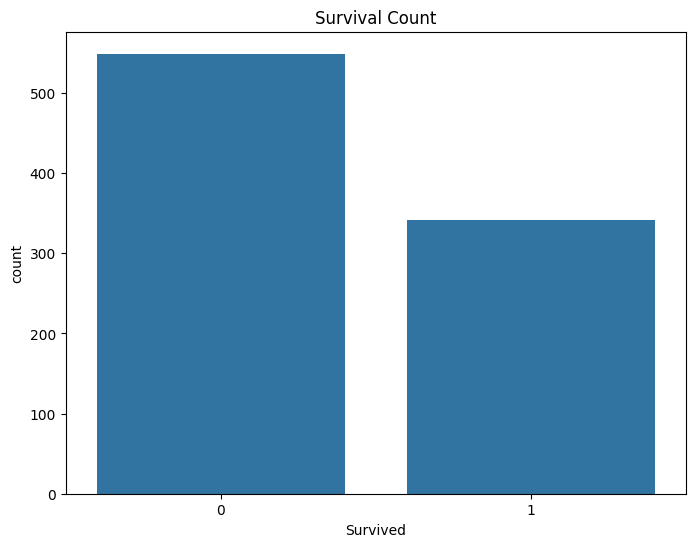

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

In [15]:
gender_survival = df.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:")
print(gender_survival)

Survival rate by gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


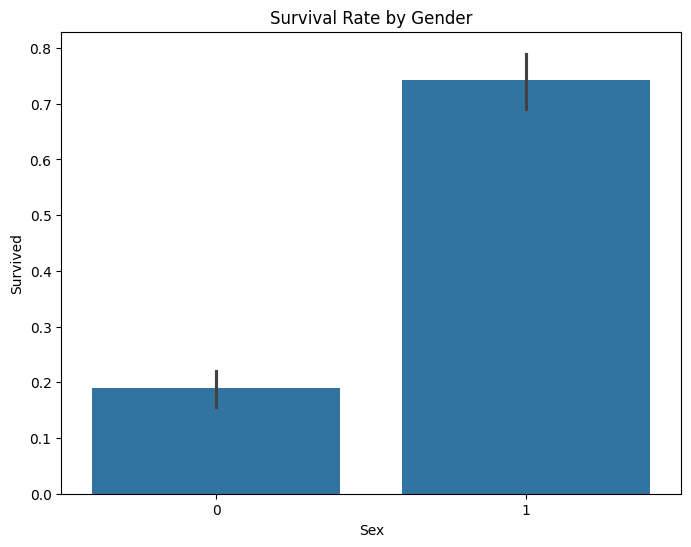

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

In [17]:
class_survival = df.groupby('Pclass')['Survived'].mean()
print("Survival rate by passenger class:")
print(class_survival)

Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


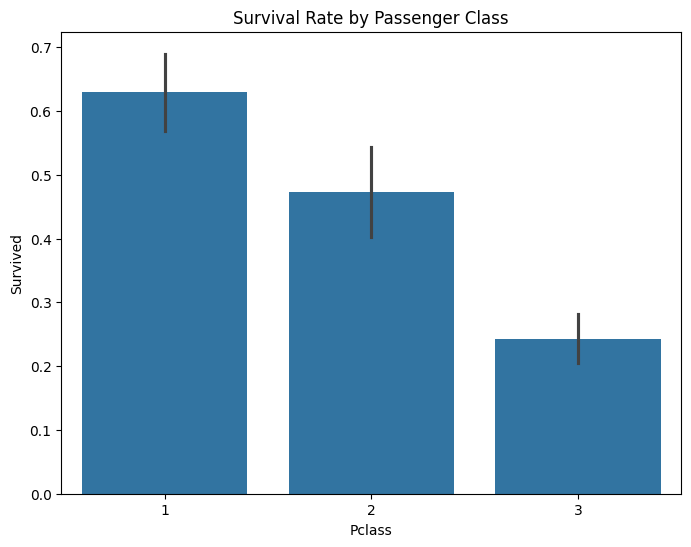

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [19]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [20]:
df = df.dropna(subset=['Age'])

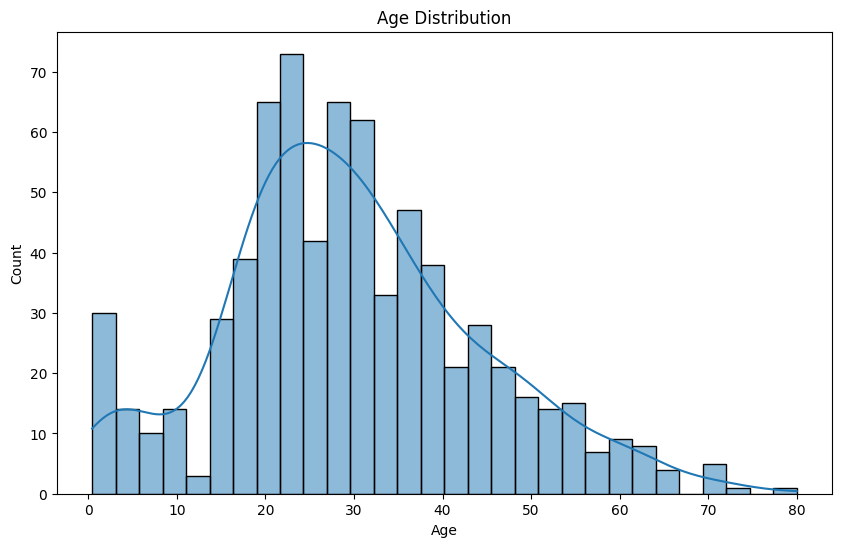

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [22]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_group_survival = df.groupby('AgeGroup', observed=False)['Survived'].mean()
print("Survival rate by age group:")
print(age_group_survival)

Survival rate by age group:
AgeGroup
Child          0.503597
Young Adult    0.382682
Adult          0.398693
Senior         0.343750
Name: Survived, dtype: float64


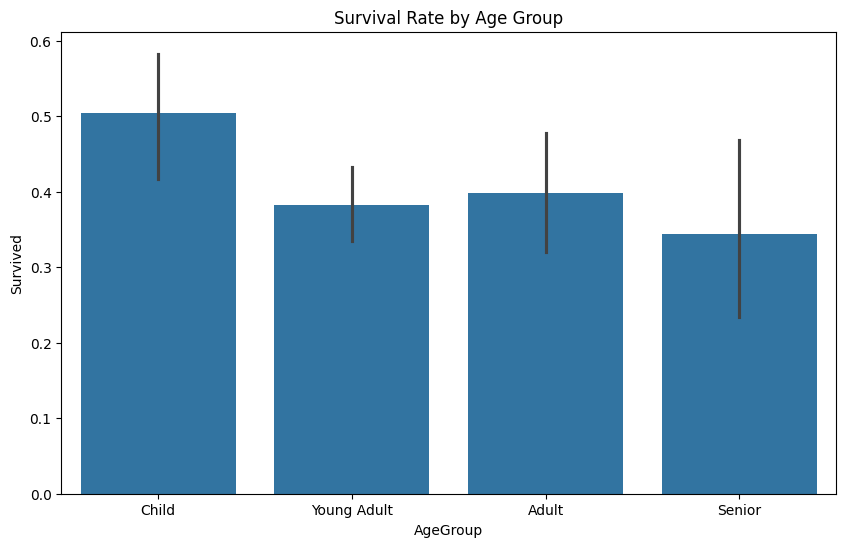

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

In [24]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_size_survival = df.groupby('FamilySize')['Survived'].mean()
print("Survival rate by family size:")
print(family_size_survival)

Survival rate by family size:
FamilySize
1    0.321782
2    0.546763
3    0.569892
4    0.777778
5    0.272727
6    0.136364
7    0.333333
8    0.000000
Name: Survived, dtype: float64


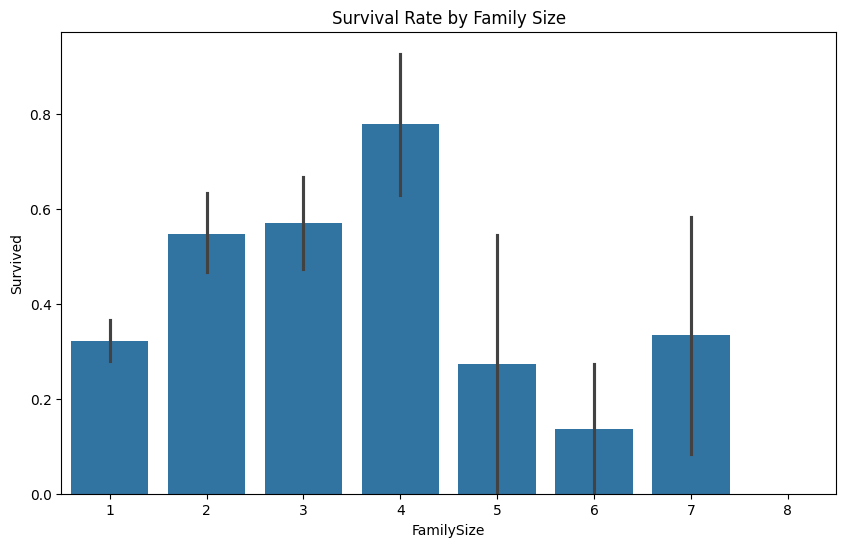

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

In [26]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [27]:
corr_matrix = numeric_df.corr()

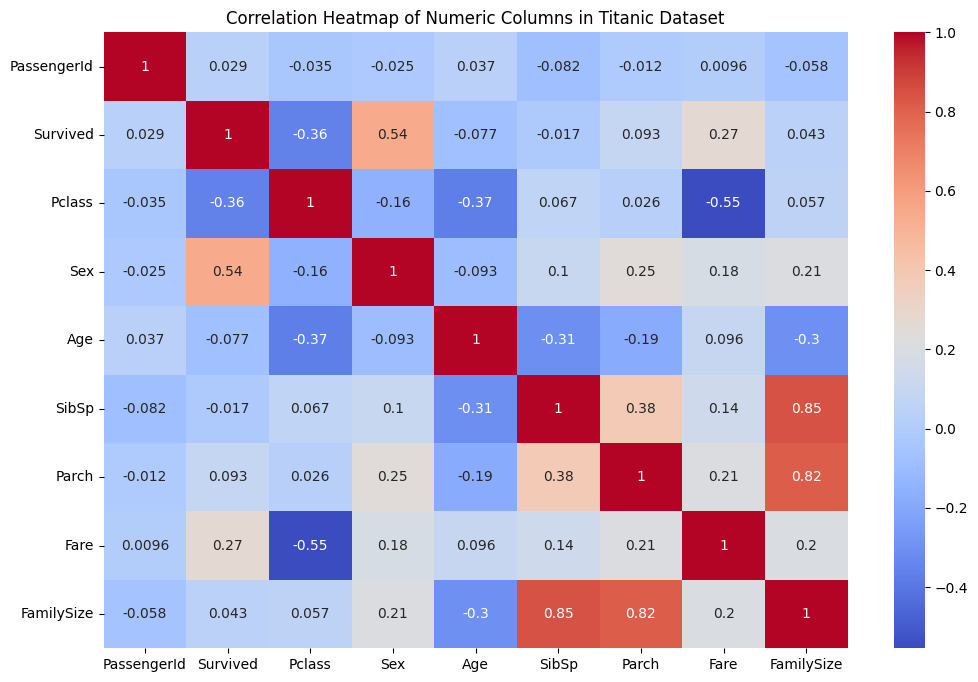

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns in Titanic Dataset')
plt.show()